# Importação de Bibliotecas

In [1]:
#importando bibliotecas
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Carga de Dados

In [2]:
#Carregando as variaveis tratadas no pré processamento
with open('../../../01-Análise Exploratória/Pré-Processamento/Census/base/census.pkl', 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

In [3]:
#Treinando o modelo
census_data = GaussianNB()
census_data.fit(x_train, y_train)

GaussianNB()

In [4]:
#Gerando previsões para a classe x_test
previsoes = census_data.predict(x_test)

In [5]:
#Acurácia do modelo
accuracy_score(y_test, previsoes) # sem o Escalonamento o resultado pode melhorar...

0.4807308460003071

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      4918
        >50K       0.32      0.97      0.48      1595

    accuracy                           0.48      6513
   macro avg       0.64      0.65      0.48      6513
weighted avg       0.81      0.48      0.48      6513



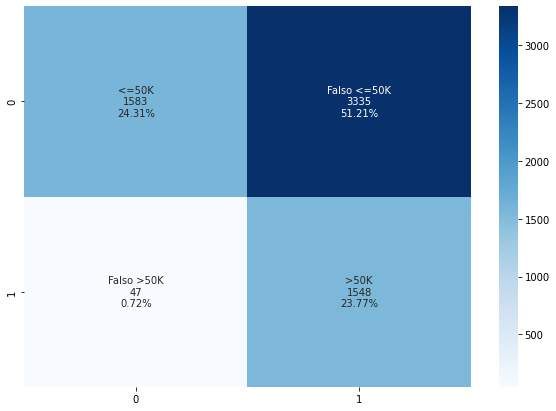

In [6]:
#Resultado da Classificação
print(classification_report(y_test, previsoes))
cf_matrix = confusion_matrix(y_test, previsoes)

plt.figure(figsize = (10,7))

group_names = ['<=50K','Falso <=50K','Falso >50K','>50K']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig('img/confusion_matrix.png', dpi=300)